# House Price Prediction

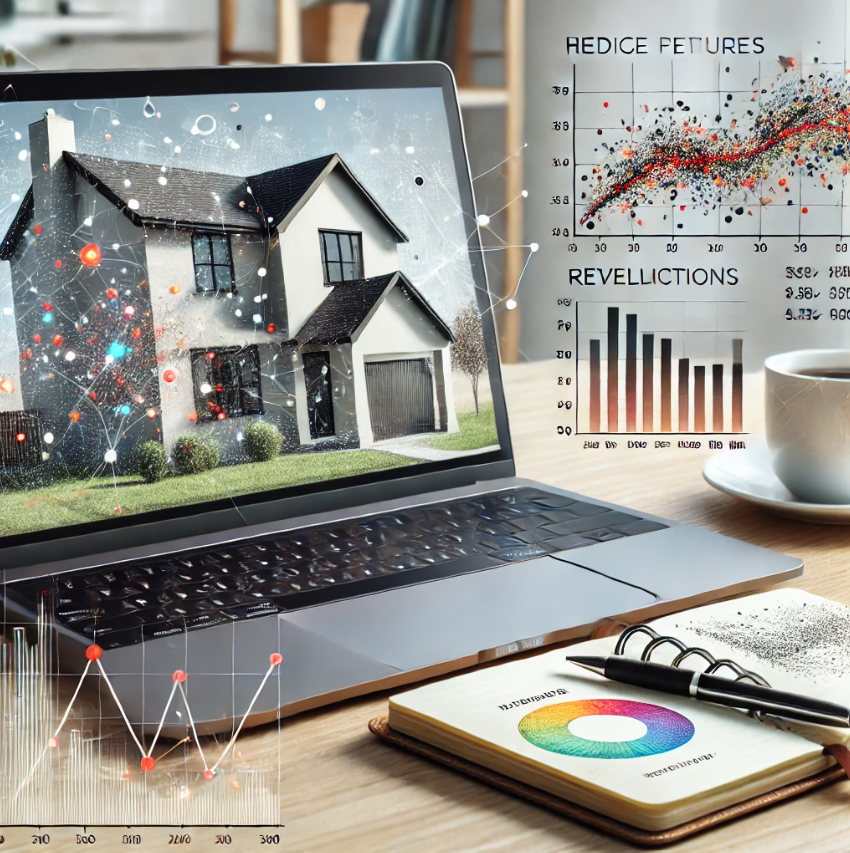

In [1]:
from IPython.display import Image, display

# Corrected file path
image_path = r"C:\Users\saire\Downloads\House_price.png"

# Display the image
display(Image(filename=image_path))


## ABSTRACT:

This research estimates house prices based on the house price dataset, which includes factors such as bedrooms, square footage, and tax values. I used two models: RandomForestRegressor to capture complex patterns and Linear Regression for a more straightforward, understandable approach. The dataset was divided into training and testing sets, and model performance was assessed using MSE and R² metrics.

The Random Forest Regressor had an MSE of 9.70 and a R² of 0.95, showing high accuracy and good fit to the data. Linear Regression got an MSE of 57.58 and a R² of 0.70, indicating poor performance with complicated data. As expected, the Random Forest model outperformed Linear Regression, however the latter produced faster and more understandable results.




Accurate house price prediction is crucial for buyers, sellers, and real estate professionals, as it helps in making informed decisions. This study explores the application of machine learning models—Random Forest and Linear Regression—for predicting house prices based on various features such as location, size, number of rooms, and amenities. The dataset used was preprocessed to handle missing values, outliers, and categorical variables.

Linear Regression was employed as a baseline model due to its simplicity and interpretability, while Random Forest was used to capture complex relationships and nonlinear dependencies in the data. The models were evaluated using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²) score. Results indicate that while Linear Regression provides a straightforward approach, Random Forest outperforms it in terms of predictive accuracy due to its ability to handle nonlinearity and feature interactions effectively.

### Details about Dataset:

Columns:

Price: The target variable (likely in thousands of dollars).

Bedroom: Number of bedrooms.

Space: Living space area (likely in square feet).

Room: Total number of rooms.

Lot: Lot size.

Tax: Property tax amount.

Bathroom: Number of bathrooms.

Garage: Garage size or count.

Condition: A rating or category of the property's condition.

In [5]:
import pandas

In [6]:
df = pandas.read_csv('House.csv')

In [7]:

df

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0
...,...,...,...,...,...,...,...,...,...
152,44.0,3.0,820.0,5.0,27.0,NaN,1.0,0.0,1.0
153,43.0,2.0,593.0,4.0,30.0,465.0,2.0,1.0,0.0
154,53.0,3.0,716.0,6.0,30.0,585.0,1.0,2.0,1.0
155,62.0,4.0,951.0,7.0,30.0,895.0,2.0,1.0,0.0


In [5]:
df.columns

Index(['Price', 'Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage',
       'Condition'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      156 non-null    float64
 1   Bedroom    156 non-null    float64
 2   Space      146 non-null    float64
 3   Room       156 non-null    float64
 4   Lot        146 non-null    float64
 5   Tax        147 non-null    float64
 6   Bathroom   156 non-null    float64
 7   Garage     156 non-null    float64
 8   Condition  156 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


# Data Preprocessing

In [7]:
df.isna().sum()

Price         1
Bedroom       1
Space        11
Room          1
Lot          11
Tax          10
Bathroom      1
Garage        1
Condition     1
dtype: int64

In [8]:
df = df.dropna()
len(df)

128

In [9]:
df

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0
...,...,...,...,...,...,...,...,...,...
149,32.0,4.0,1065.0,7.0,25.0,492.0,1.5,0.0,0.0
151,42.0,3.0,585.0,5.0,50.0,713.0,1.0,0.0,0.0
153,43.0,2.0,593.0,4.0,30.0,465.0,2.0,1.0,0.0
154,53.0,3.0,716.0,6.0,30.0,585.0,1.0,2.0,1.0


# Unique Values

In [10]:
df.nunique().to_frame(name="Unique Values")

,Unique Values
Price,45
Bedroom,7
Space,121
Room,7
Lot,11
Tax,123
Bathroom,5
Garage,4
Condition,2


# Statistics

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,128.0,56.718750,13.348708,32.0,46.00,56.0,64.00,90.0
Bedroom,128.0,3.195312,1.392096,1.0,2.00,3.0,4.00,8.0
Space,128.0,1109.382812,480.844011,539.0,809.75,963.5,1199.50,2295.0
Room,128.0,6.531250,1.724933,4.0,5.00,6.0,7.00,12.0
Lot,128.0,32.664062,8.630907,24.0,25.00,30.0,35.50,50.0
Tax,128.0,925.476562,435.174559,418.0,679.75,855.5,1039.75,2752.0
Bathroom,128.0,1.488281,0.548674,1.0,1.00,1.5,2.00,3.0
Garage,128.0,0.812500,0.810852,0.0,0.00,1.0,1.50,2.0
Condition,128.0,0.226562,0.420252,0.0,0.00,0.0,0.00,1.0


# Exploratory Data Analysis (EDA)

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
import seaborn as sns

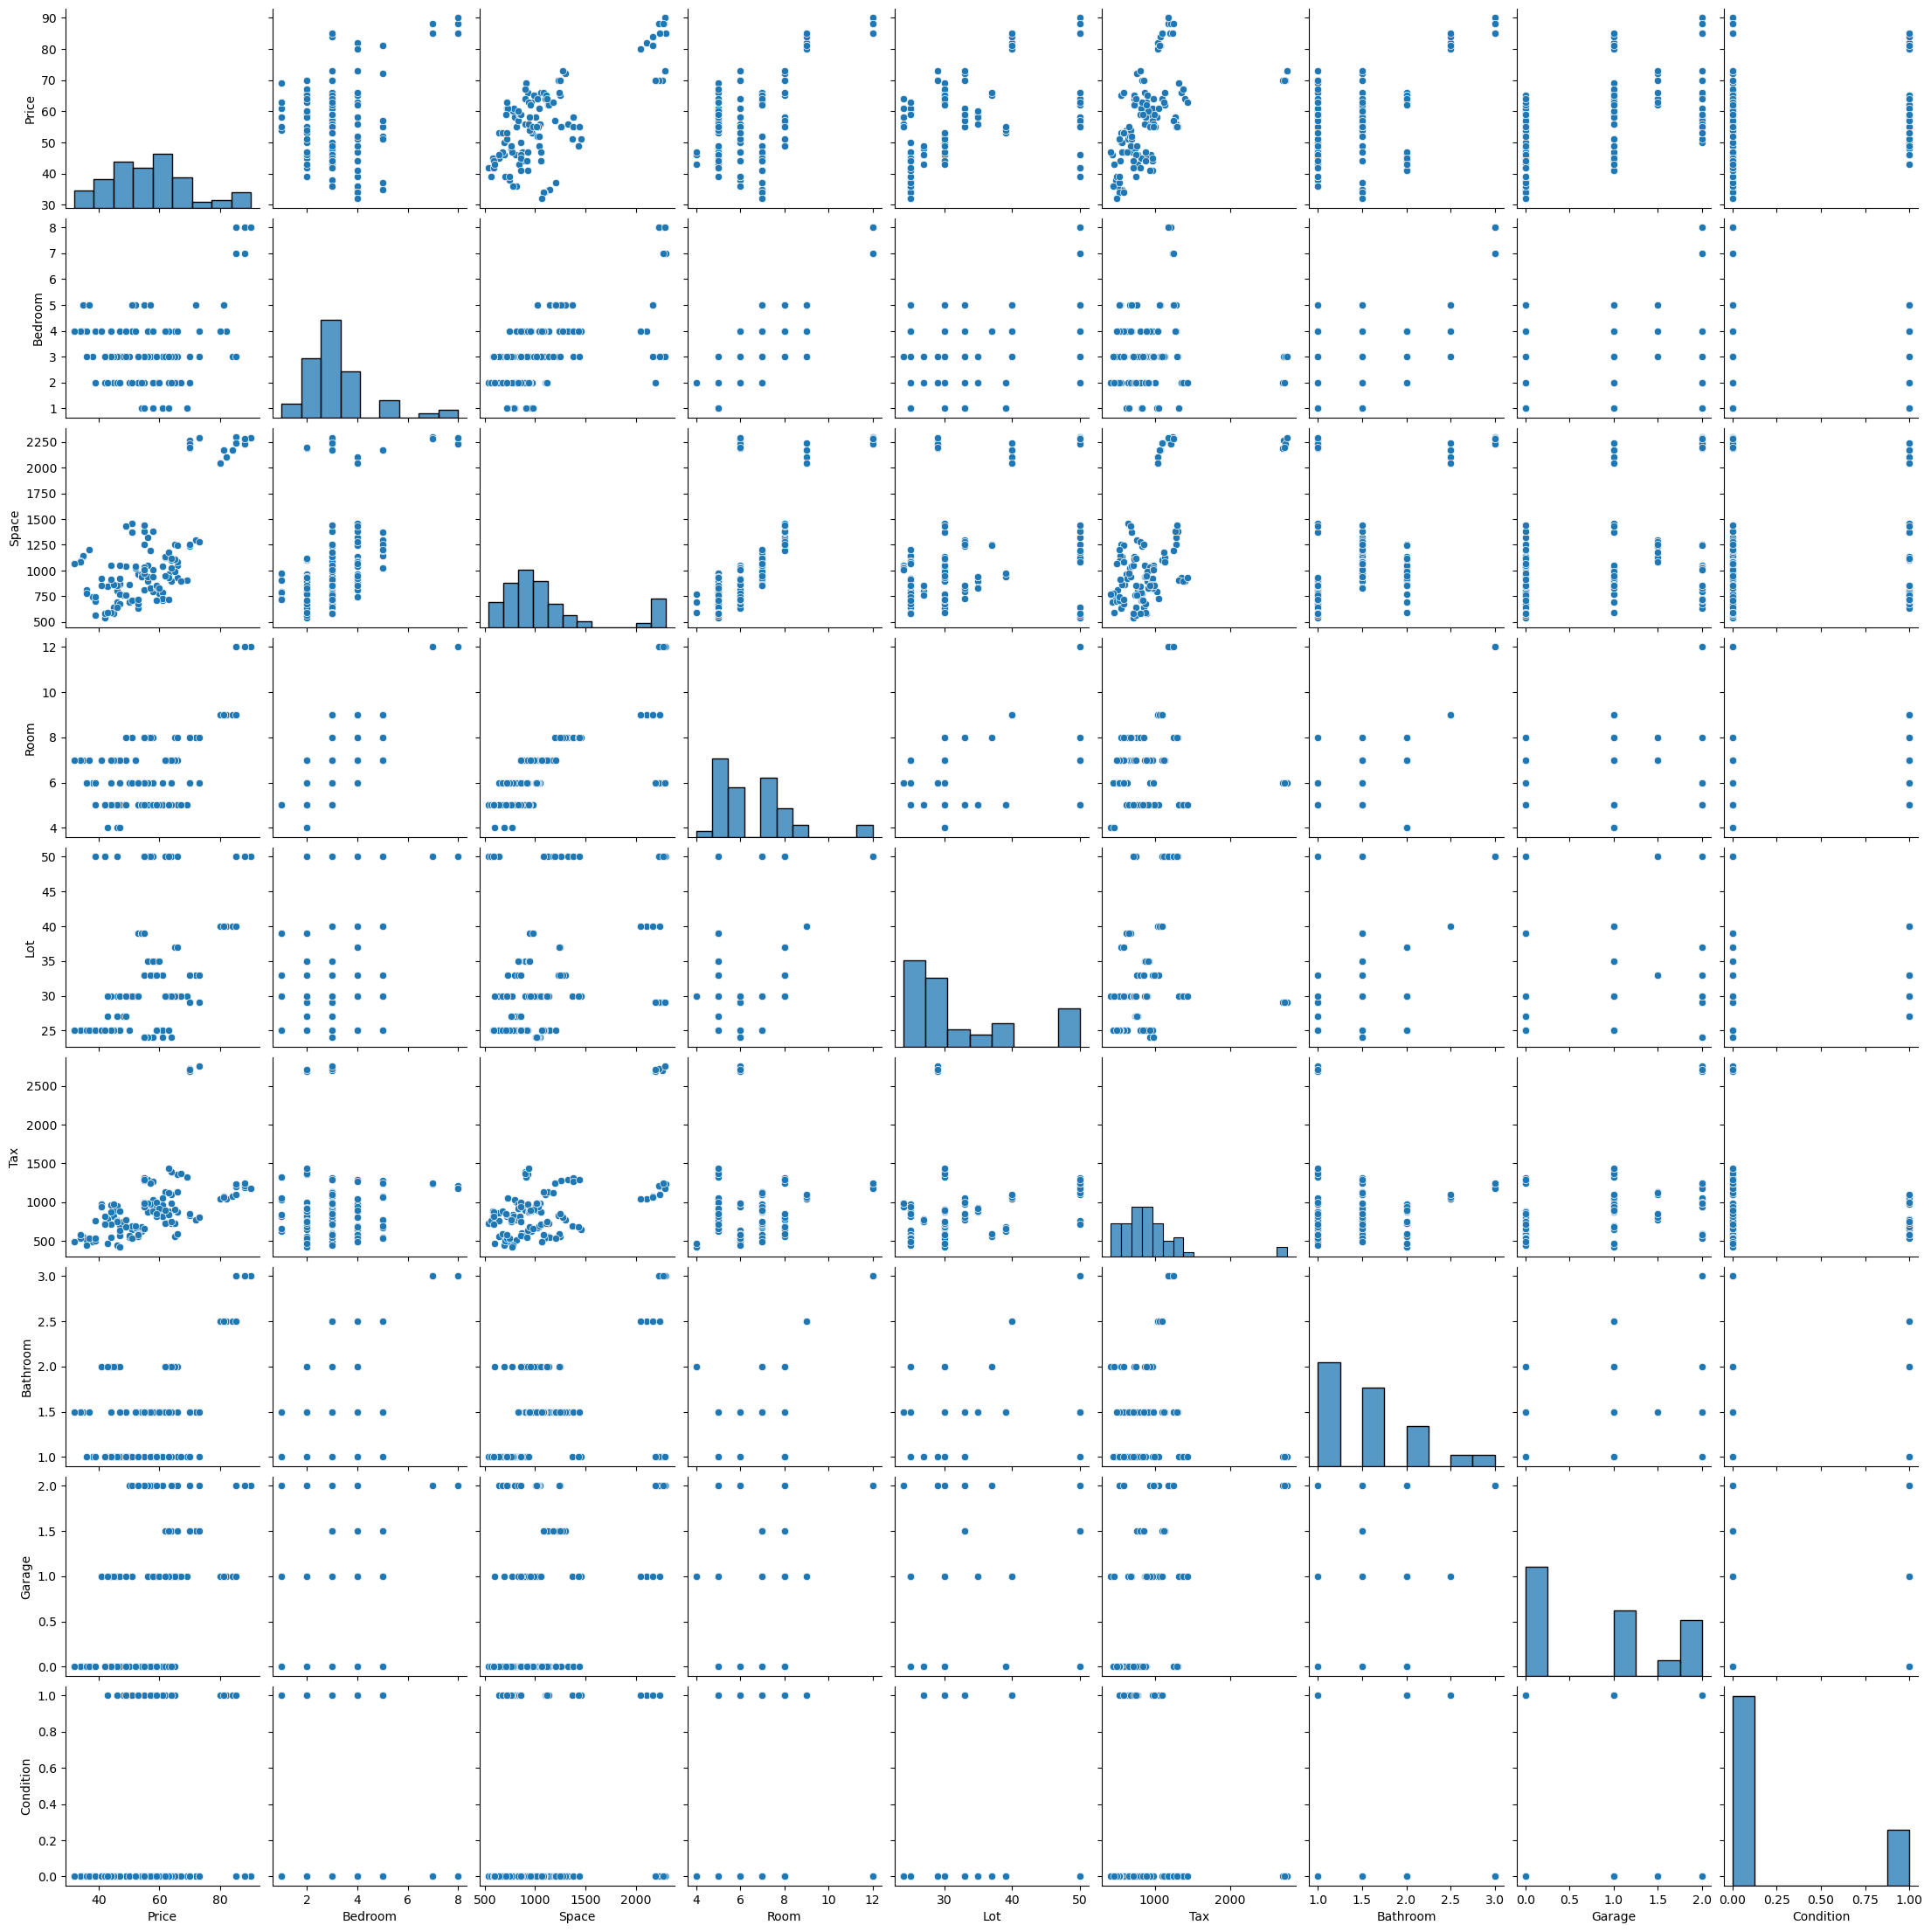

In [14]:
sns.pairplot(df)

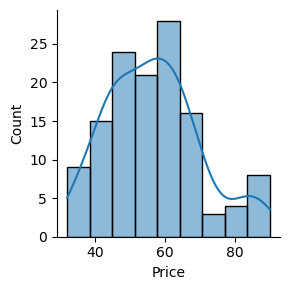

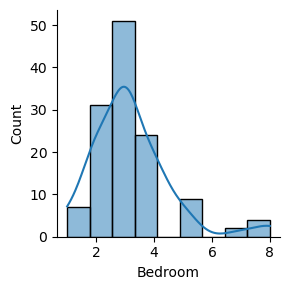

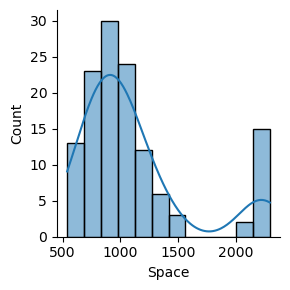

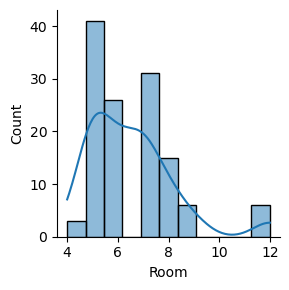

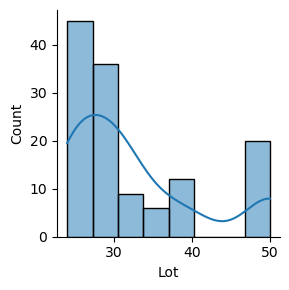

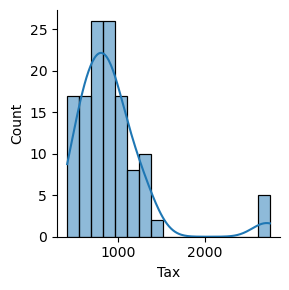

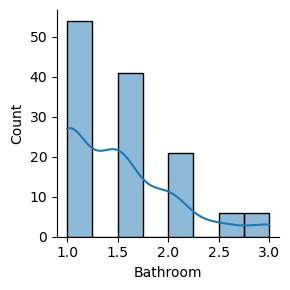

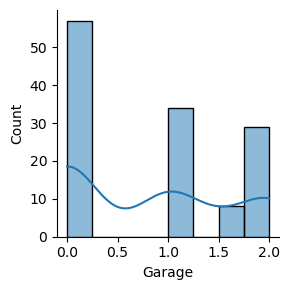

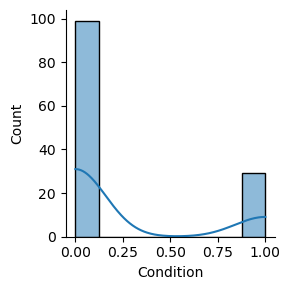

In [ ]:
columns = ['Price', 'Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage', 'Condition']

for col in columns:
    sns.displot(data=df, x=col, kind='hist', height=3, kde=True)


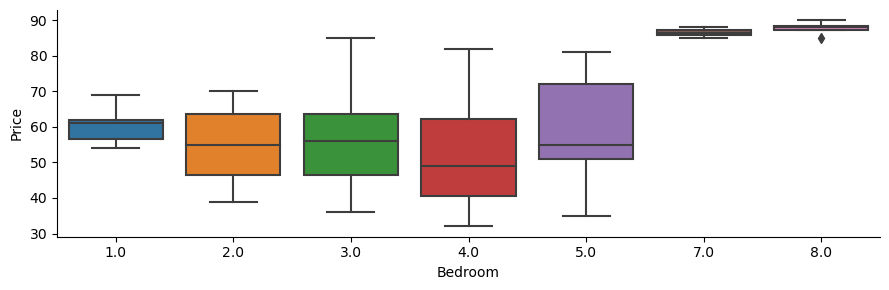

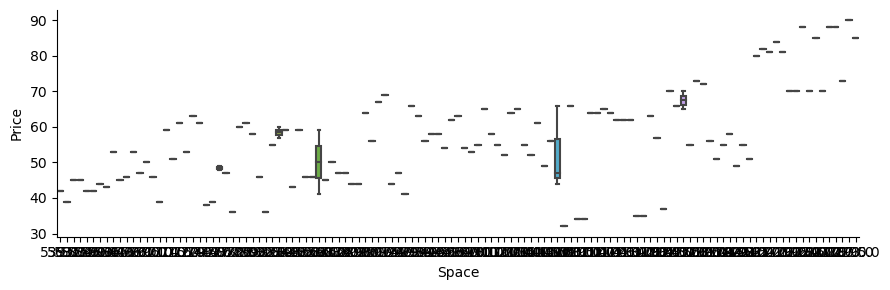

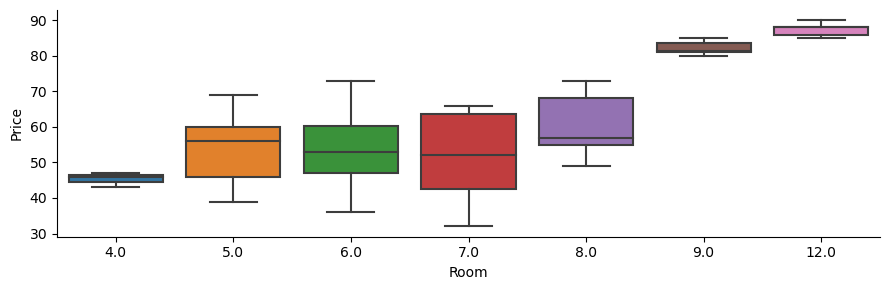

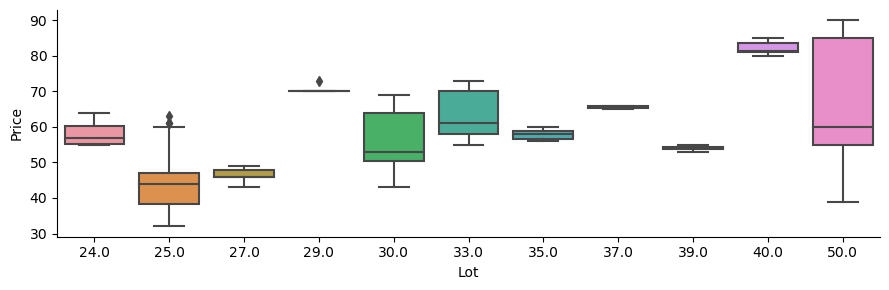

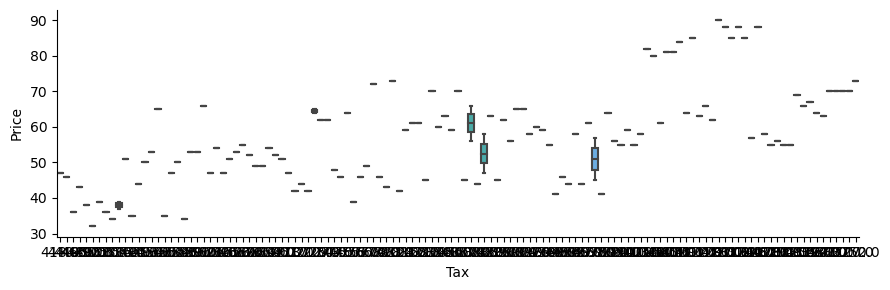

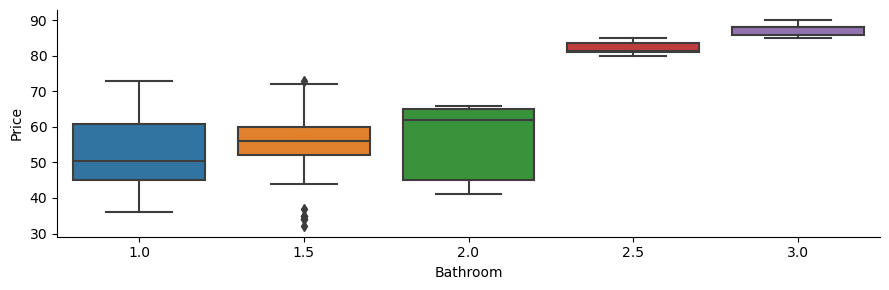

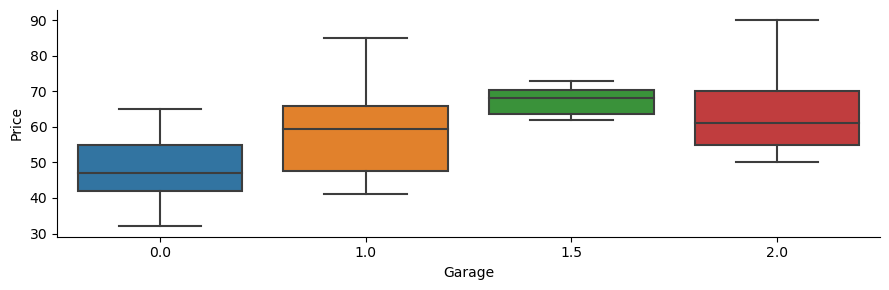

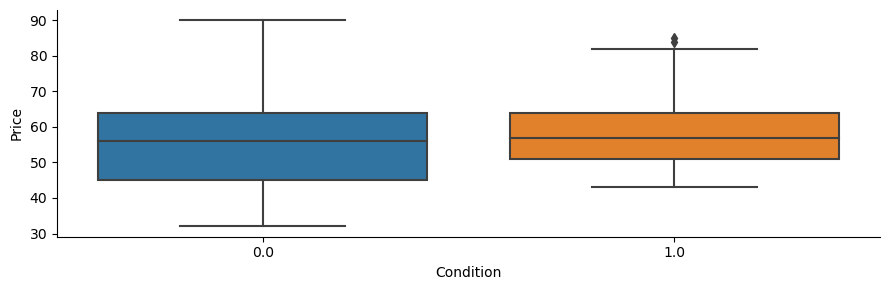

In [ ]:
columns = [ 'Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage', 'Condition']

for col in columns:
    sns.catplot(data=df, x=col,y='Price',  kind='box',aspect=3, height=3)


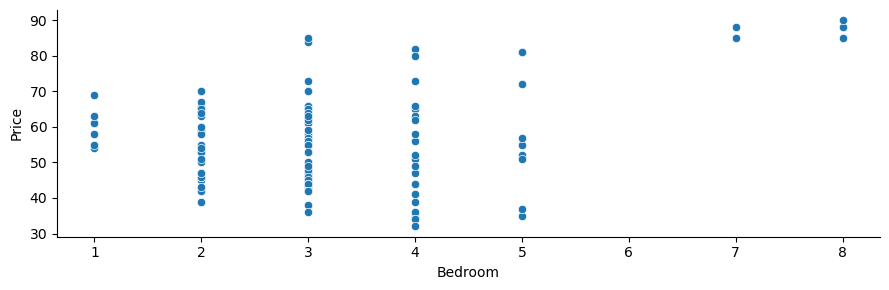

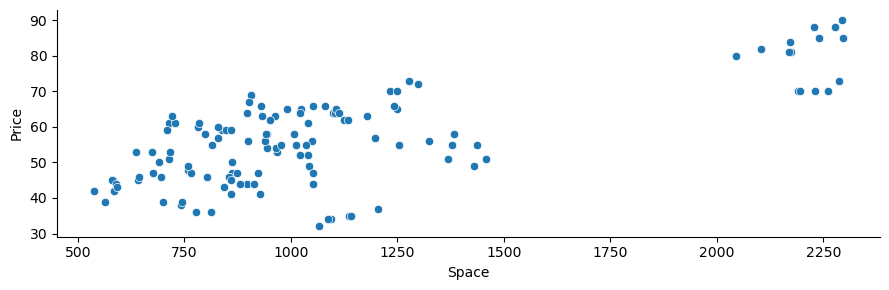

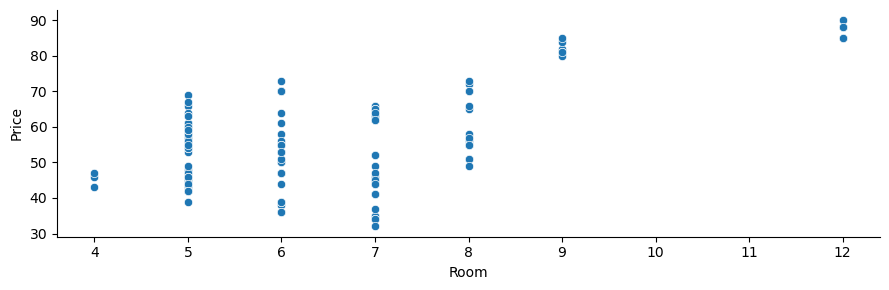

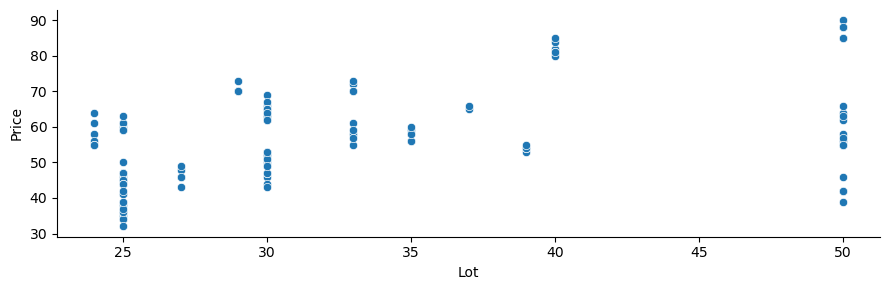

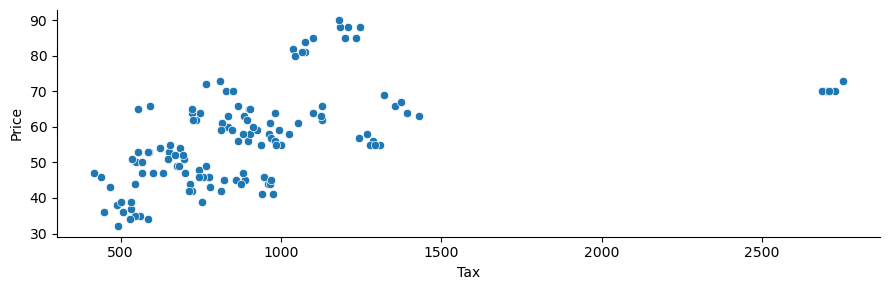

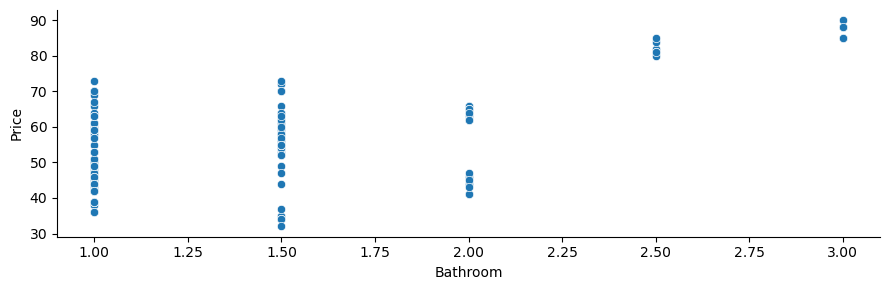

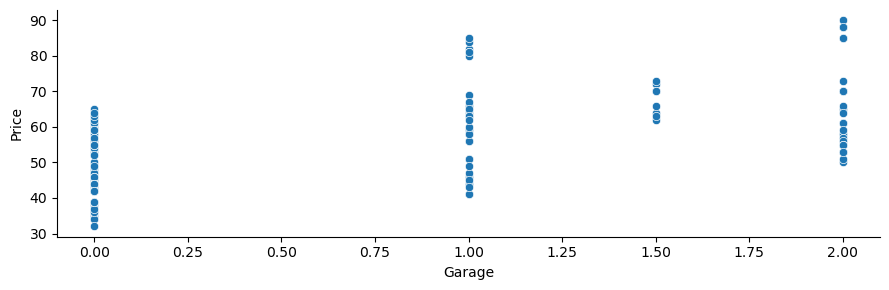

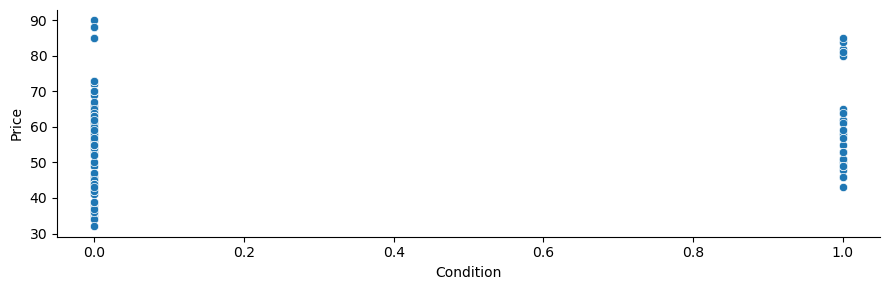

In [ ]:
columns = [ 'Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage', 'Condition']

for col in columns:
    sns.relplot(data=df, x=col,y='Price',  kind='scatter',aspect=3, height=3)


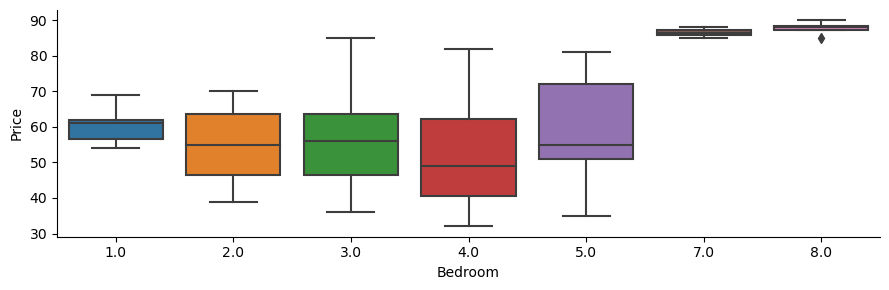

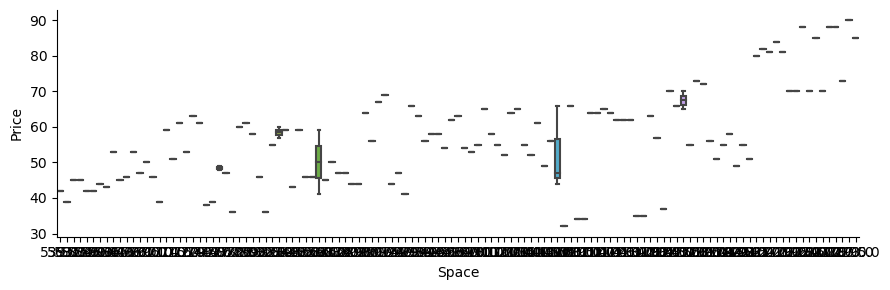

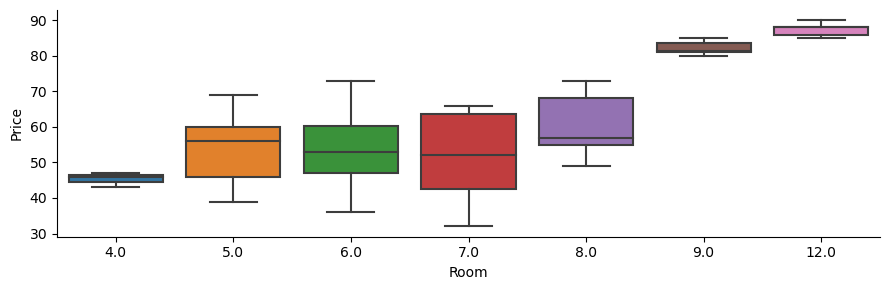

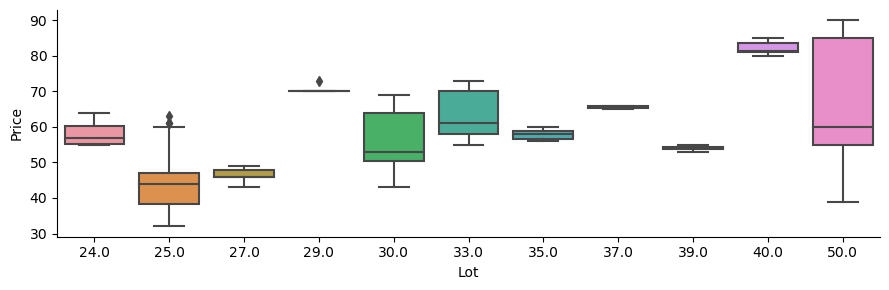

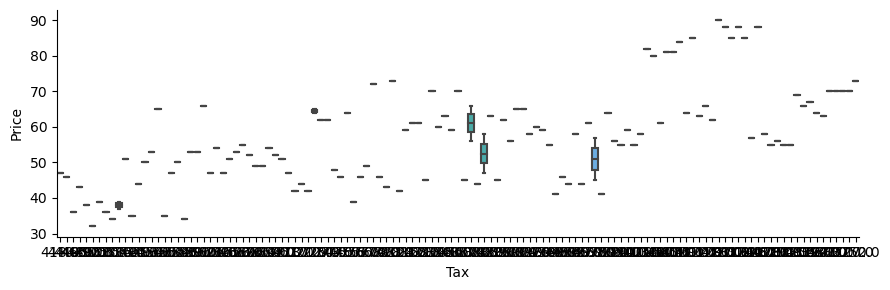

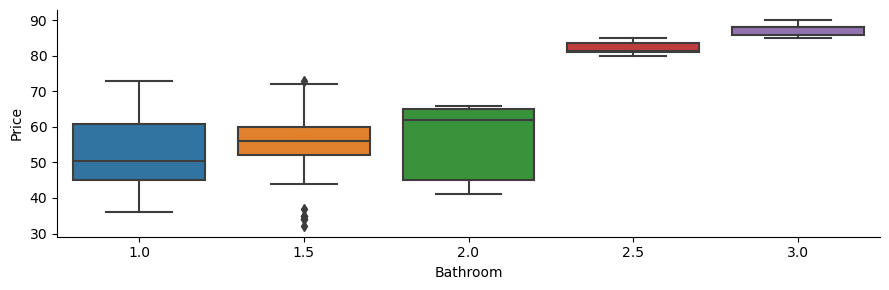

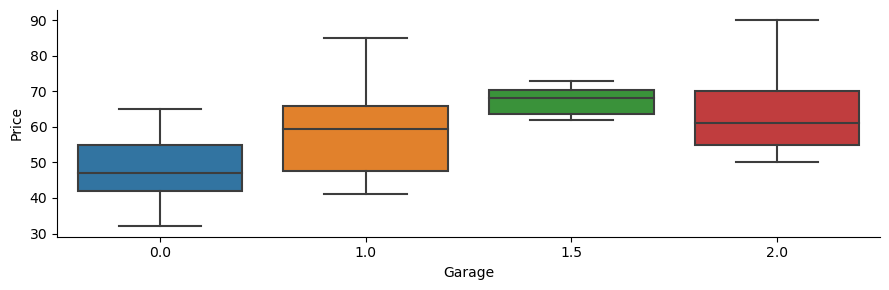

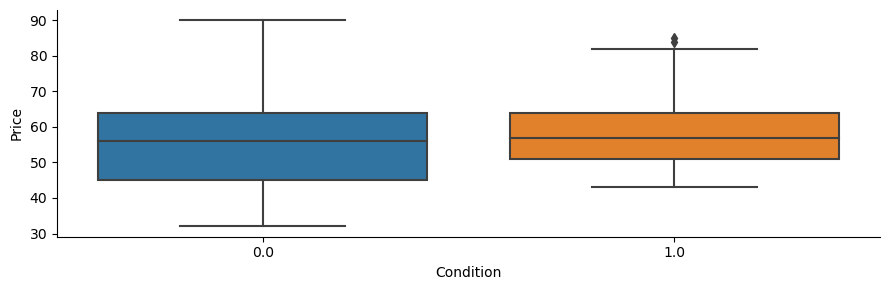

In [ ]:
columns = [ 'Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage', 'Condition']

for col in columns:
    sns.catplot(data=df, x=col,y='Price',  kind='box',aspect=3, height=3)


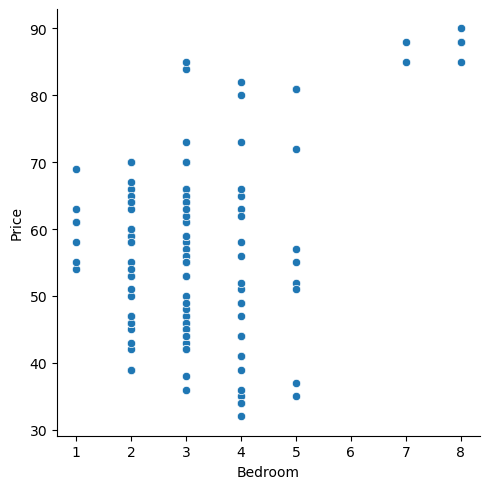

In [31]:
sns.relplot(df, x='Bedroom', y='Price' )

# Correlation Matrix
A correlation matrix is used to measure the relationships between multiple variables in a dataset. It helps:

✅ **Identify Strong Relationships** – Shows how variables are related (positive or negative correlation).

✅ **Feature Selection** – Helps remove highly correlated variables to prevent multicollinearity in models.

✅ **Understand Data Patterns** – Detect dependencies between variables, useful in predictive modeling.

In [17]:
correlation_matrix = df.corr()
correlation_matrix

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
Price,1.000000,0.321623,0.739074,0.578310,0.467262,0.505958,0.567729,0.555242,0.137773
Bedroom,0.321623,1.000000,0.581410,0.841807,0.357425,0.045922,0.621555,0.189651,-0.116611
Space,0.739074,0.581410,1.000000,0.761927,0.422497,0.609800,0.598866,0.407141,0.079876
Room,0.578310,0.841807,0.761927,1.000000,0.499721,0.142749,0.767886,0.285706,0.039036
Lot,0.467262,0.357425,0.422497,0.499721,1.000000,0.202397,0.421500,0.154071,-0.037464
Tax,0.505958,0.045922,0.609800,0.142749,0.202397,1.000000,0.018013,0.420709,-0.133850
Bathroom,0.567729,0.621555,0.598866,0.767886,0.421500,0.018013,1.000000,0.269352,-0.005469
Garage,0.555242,0.189651,0.407141,0.285706,0.154071,0.420709,0.269352,1.000000,0.125645
Condition,0.137773,-0.116611,0.079876,0.039036,-0.037464,-0.133850,-0.005469,0.125645,1.000000


<Axes: >

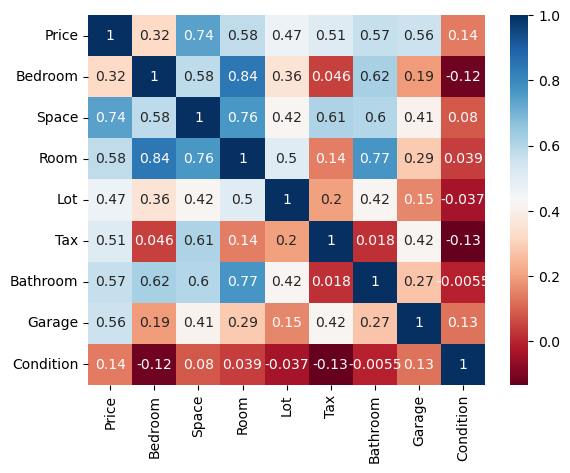

In [ ]:
sns.heatmap(correlation_matrix, annot = True, cmap='RdBu')

# ALteranative method of Data Preprocessing

In [11]:
pip install dtale

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas
import warnings
warnings.filterwarnings('ignore')
import dtale

In [13]:
dtale.show(df)

# Linear Regression Model


In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Define features and target variable
X = df[['Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage', 'Condition']]  # Features
y = df['Price']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_linear = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_linear)
lr_score = r2_score(y_test, y_pred_linear)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", lr_score)

# Display coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)


Mean Squared Error (MSE): 57.58007022464957
R-squared (R²): 0.699474000371656
     Feature  Coefficient
0    Bedroom    -2.292519
1      Space     0.010073
2       Room     0.523859
3        Lot     0.276679
4        Tax     0.003365
5   Bathroom     7.291245
6     Garage     5.116366
7  Condition     1.899911


In [23]:
model.intercept_

21.768585262810618

In [20]:
y_test

63     45.0
45     35.0
23     46.0
36     88.0
113    81.0
64     47.0
81     55.0
119    63.0
94     62.0
30     62.0
108    63.0
31     46.0
74     43.0
4      64.0
110    49.0
133    55.0
41     61.0
93     59.0
153    43.0
98     36.0
22     46.0
12     47.0
140    88.0
13     49.0
120    65.0
51     66.0
Name: Price, dtype: float64

In [100]:
y_pred_linear

array([40.3338311 , 45.15732474, 55.76961195, 82.58212995, 76.77426637,
       41.38740322, 59.42613713, 46.38960254, 57.19314891, 66.12473311,
       66.65183219, 56.97649743, 45.2780687 , 65.78202391, 56.08305291,
       59.34927641, 46.96023945, 45.29220537, 54.81625939, 41.57998652,
       47.15758233, 42.94435307, 85.08333134, 48.28364542, 59.2136805 ,
       60.0816843 ])

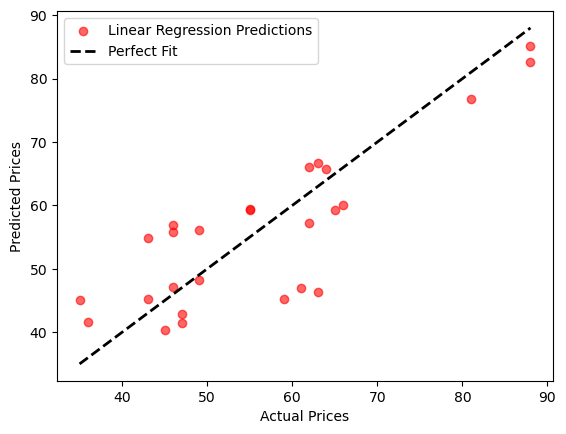

In [96]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_linear, alpha=0.6, label="Linear Regression Predictions", color="red")
# Perfect Prediction Line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2, label="Perfect Fit")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.show()



# RandomForestRegressor

In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Define features and target variable
X = df[['Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage', 'Condition']]  # Features
y = df['Price']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 trees in the forest

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_rf)
rf_score = r2_score(y_test, y_pred_rf)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", rf_score)



Mean Squared Error (MSE): 9.699415384615385
R-squared (R²): 0.9493761210623842


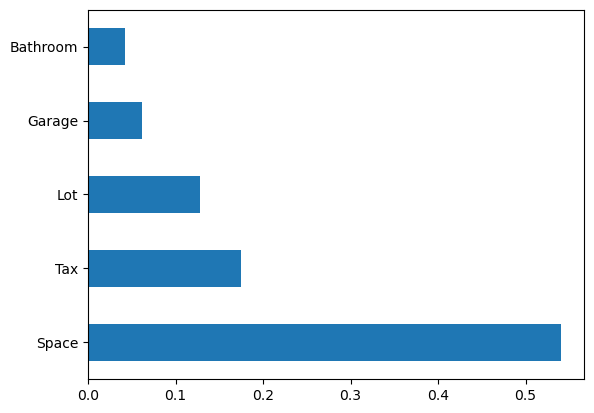

In [99]:
# Feature Importances

import matplotlib.pyplot as plt
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances .nlargest(5).plot(kind='barh')
plt.show()


In [ ]:
y_test

63     45.0
45     35.0
23     46.0
36     88.0
113    81.0
64     47.0
81     55.0
119    63.0
94     62.0
30     62.0
108    63.0
31     46.0
74     43.0
4      64.0
110    49.0
133    55.0
41     61.0
93     59.0
153    43.0
98     36.0
22     46.0
12     47.0
140    88.0
13     49.0
120    65.0
51     66.0
Name: Price, dtype: float64

In [101]:
y_pred_rf

array([46.56, 37.61, 47.85, 88.16, 81.59, 45.37, 60.01, 58.1 , 60.51,
       63.71, 63.7 , 46.03, 49.06, 63.69, 53.27, 59.75, 57.39, 56.61,
       47.1 , 40.57, 49.48, 48.87, 86.12, 51.4 , 61.05, 63.32])

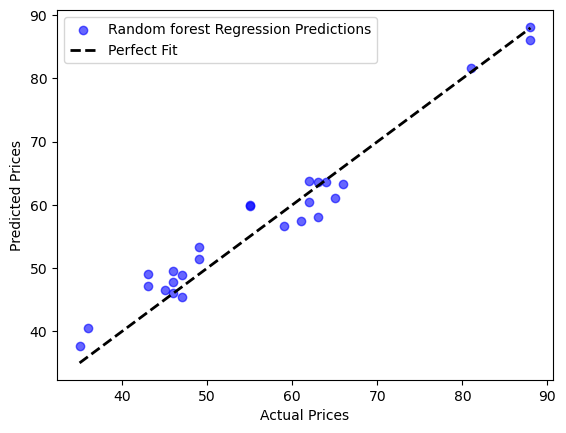

In [102]:
plt.scatter(y_test, y_pred_rf, alpha=0.6, label="Random forest Regression Predictions", color="blue")
# Perfect Prediction Line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2, label="Perfect Fit")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.show()


# COMPARSION BETWEEN LINEAR REGRESSION AND RANDOM FOREST 

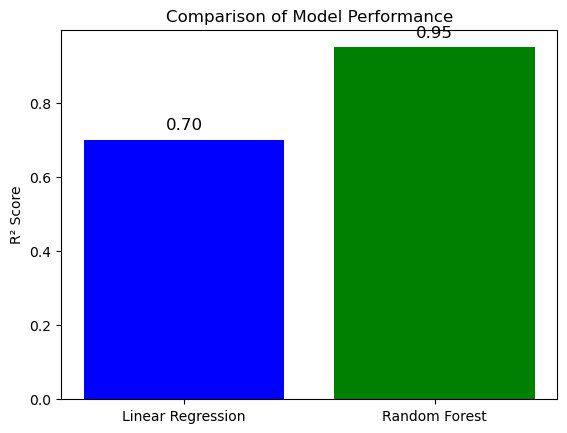

In [90]:
import matplotlib.pyplot as plt

model_names = ['Linear Regression', 'Random Forest']
scores = [lr_score, rf_score]

# Create a bar plot
plt.bar(model_names, scores, color=['blue', 'green'])

# Add labels and title
plt.ylabel('R² Score')
plt.title('Comparison of Model Performance')

# Display the score on top of each bar
for i, score in enumerate(scores):
    plt.text(i, score + 0.02, f'{score:.2f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()


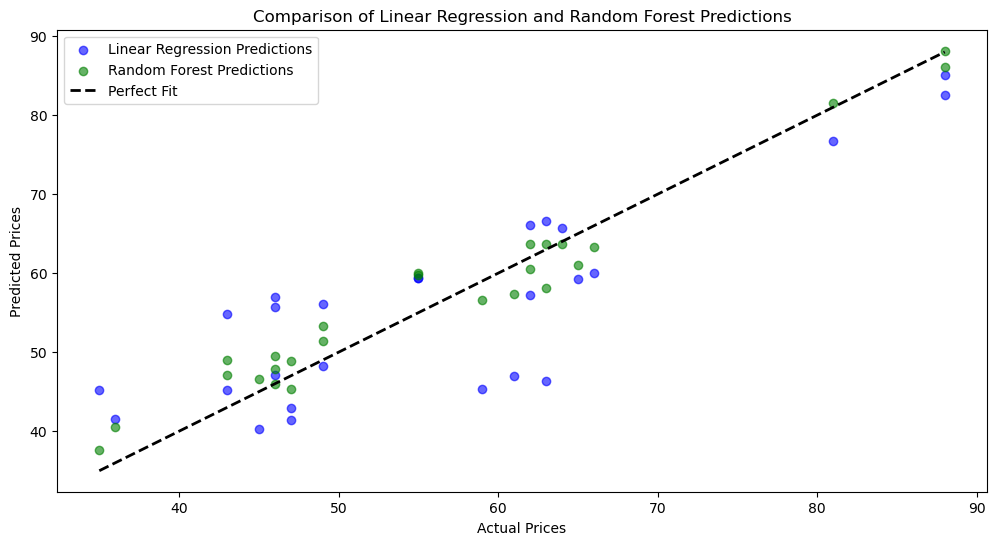

In [103]:
### COMPARSION BETWEEN LINEAR REGRESSION AND RANDOM FOREST GRAPH
# Plot the comparison
plt.figure(figsize=(12, 6))

# Actual vs Linear Regression
plt.scatter(y_test, y_pred_linear, alpha=0.6, label="Linear Regression Predictions", color="blue")

# Actual vs Random Forest
plt.scatter(y_test, y_pred_rf, alpha=0.6, label="Random Forest Predictions", color="green")

# Perfect Prediction Line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2, label="Perfect Fit")

plt.title("Comparison of Linear Regression and Random Forest Predictions")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.show()


# Deployment of Model

In [1]:
pip install gradio

In [105]:
import pandas as pd
import joblib
import gradio as gr
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Load the dataset
df = pd.read_csv("House.csv")
df.isnull().sum()
df = df.dropna()

# Define features and target
target = "Price"
features = [col for col in df.columns if col != target]

# Split data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, "house_price_model.pkl")

# Load model for Gradio
model = joblib.load("house_price_model.pkl")

# Define prediction function
def predict_price(*features):
    input_data = pd.DataFrame([features], columns=X.columns)
    prediction = model.predict(input_data)[0]
    return round(prediction, 2)

# Create Gradio interface
inputs = [gr.Number(label=col) for col in X.columns]
iface = gr.Interface(fn=predict_price, inputs=inputs, outputs="number", title="House Price Prediction")

# Launch the app
iface.launch()


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


# Uses of this project

1. **Helps Buyers and Sellers Make Informed Decisions**

- Buyers: Understand whether a house is fairly priced and make informed purchasing decisions.

- Sellers: Set competitive prices based on market trends to attract buyers and maximize profit.

2. **Real Estate Investment and Profit Maximization**

- Investors can identify undervalued properties and predict future price trends to make profitable investments.

- Helps in deciding when to buy or sell based on expected price fluctuations.

3. **Supports Banks and Financial Institutions**

- Used in mortgage lending to assess the value of a property before approving home loans.

- Helps in risk assessment and reducing loan defaults.

4. **Aids Government and Policy Makers**

- Helps in urban planning by predicting real estate trends.

- Used for property tax assessments and economic analysis.

5. **Enhances Smart City Development and Infrastructure Planning**

- Authorities can analyze which areas are growing in value and plan better infrastructure accordingly.

- Helps in setting housing policies and affordable housing programs.

6. **Benefits Real Estate Agents and Developers**

- Helps real estate agents provide better price estimates to clients.

- Developers can decide on pricing strategies for new projects.

7. **Reduces Market Speculation and Bubbles**

- Predictive models help prevent overpricing and underpricing, reducing the risk of market crashes.